<a href="https://colab.research.google.com/github/Al-x-R/Colab-examples/blob/master/036_ann_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt


In [0]:
class NeuralNetwork:

  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes
    self.learning_rate = learning_rate
    self.activation_function = lambda x: special.expit(x) #ф-ция активации - сигмоид
    self.wih = np.random.normal(loc=0.0, scale=pow(self.hidden_nodes, -0.5), size=(self.hidden_nodes, self.input_nodes)) # входящие
    self.who = np.random.normal(loc=0.0, scale=pow(self.output_nodes, -0.5), size=(self.output_nodes, self.hidden_nodes)) # выходящие

  def train(self, inputs_list, targets_list):
    inputs = np.array(inputs_list, ndmin=2).transpose() # transpose - ставим матрицу вертикально
    targets = np.array(targets_list, ndmin=2).transpose() # ndmin=2 - min значение размерности
    hidden_inputs = np.dot(self.wih, inputs) # перемножаем матрицы
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)
    output_errors = targets - final_outputs
    hidden_errors = np.dot(self.who.transpose(), output_errors)
    self.who += self.learning_rate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), hidden_outputs.transpose())
    self.wih += self.learning_rate * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), inputs.transpose())

  def query(self, inputs_list):
    inputs = np.array(inputs_list, ndmin=2).transpose()
    hidden_inputs = np.dot(self.wih, inputs) # перемножаем матрицы
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)
    return final_outputs


  

In [0]:
i_n = 3
h_n = 3
o_n = 3
l_r = 0.3
nn1 = NeuralNetwork(input_nodes=i_n, hidden_nodes=h_n, output_nodes=o_n, learning_rate=l_r)

In [0]:
inp = [1.0, 0.5, -1.0]
res = nn1.query(inputs_list=inp)
print(res)

[[0.63837254]
 [0.27165129]
 [0.535277  ]]


In [0]:
tar = [0.1, 0.9, 0.2]
for i in range(10000):
  nn1.train(inputs_list=inp, targets_list=tar)

res = nn1.query(inputs_list=inp)
print(res)


[[0.1]
 [0.9]
 [0.2]]


In [0]:
with open('mnist_train_100.csv', 'r') as data:
  data_list = data.readlines()
  for line in data_list[:3]:
    print(line)

5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

5


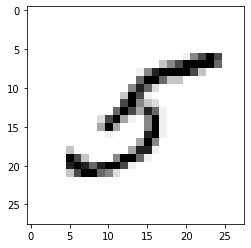

In [0]:
ind = 35

arr = np.asfarray(data_list[ind].split(','))[1:].reshape(28, 28)
print(data_list[ind][0]) #вывод самого числа
plt.imshow(arr, cmap='Greys');

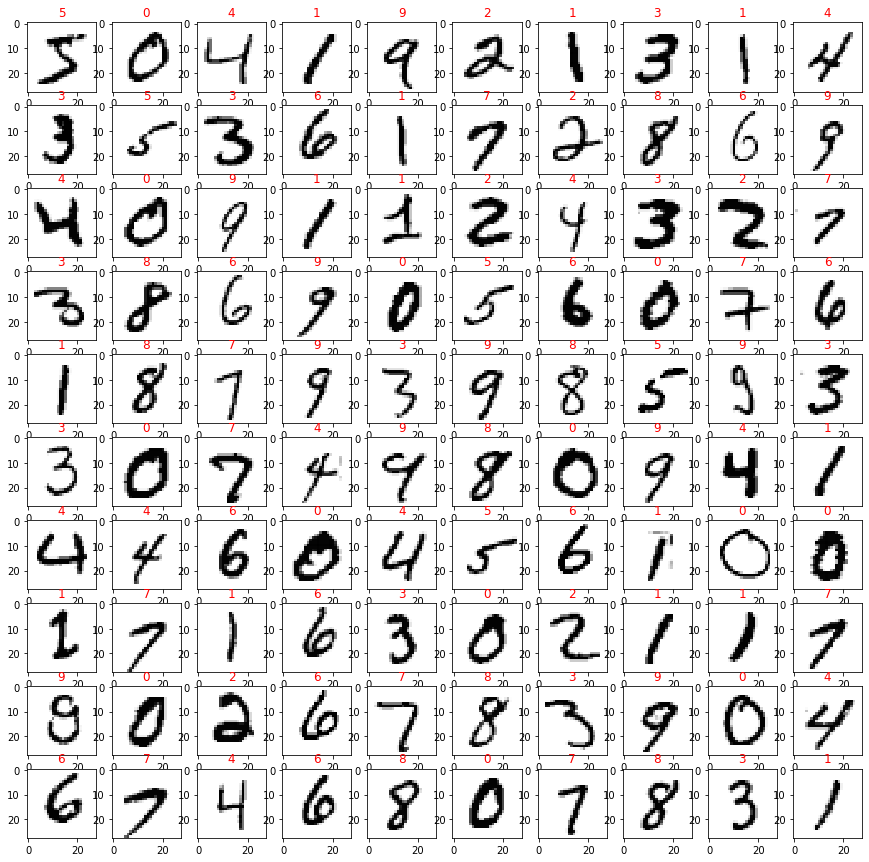

In [0]:
n = 10
fig, axs = plt.subplots(n, n, figsize=(15, 15))
for i in range(n):
  for j in range(n):
    arr = np.asfarray(data_list[i * n + j].split(','))[1:].reshape(28, 28)
    axs[i, j].imshow(arr, cmap='Greys')
    axs[i, j].set_title(data_list[i * n + j][0], c='red'); 

In [0]:
i1 = 2
values = np.asfarray(data_list[i1].split(','))
scaled_input = values[1:] / 255.0 * 0.99 + 0.01 # перевод пикселей до значений от 0.01 до 1.0 вместо от 0 до 255
print(max(scaled_input))
print(scaled_input.shape)

1.0
(784,)


In [0]:
targets = np.zeros(10) + 0.01
targets[int(values[0])] = 0.99
targets

array([0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01])

In [0]:
input_n = 784
hidden_n = 200
output_n = 10

learning_r = 0.1
nn2 = NeuralNetwork(input_nodes=input_n, hidden_nodes=hidden_n, output_nodes=output_n, learning_rate=learning_r)

In [0]:
epochs = 50

for e in range(epochs):
  for record in data_list:
    values = np.asfarray(record.split(','))
    scaled_input = values[1:] / 255.0 * 0.99 + 0.01
    targets = np.zeros(output_n) + 0.01
    targets[int(values[0])] = 0.99
    nn2.train(inputs_list=scaled_input, targets_list=targets)


In [0]:
test_data_file = open('mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()[1:]
test_data_file.close()

In [0]:
scorecard = [] #ведем счет если угдали то 1 если нет то 0
recognized = []
fact = []

for record in test_data_list:
  values = np.asfarray(record.split(','))
  correct_label = int(values[0])
  scaled_inputs = values[1:] / 255.0 * 0.99 + 0.01
  outputs = nn2.query(inputs_list=scaled_inputs)
  label = np.argmax(outputs) # argmax - возвращает индекс самого большого элемента
  recognized.append(label)
  fact.append(correct_label)
  if label == correct_label:
    scorecard.append(1)
  else:
    scorecard.append(0)


In [0]:
print(sum(scorecard)/len(scorecard))

0.6706


In [0]:
print(fact)
print(recognized)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [0]:
for v1, v2 in zip(fact, recognized):
  if v1 != v2:
    print(f'{v1}->{v2}', end='  ')

4->9  9->3  5->1  6->9  9->7  5->3  9->7  6->1  7->1  2->1  3->4  5->3  2->5  5->4  5->3  6->4  9->7  8->2  3->2  7->3  6->7  9->8  2->7  6->4  9->4  7->3  9->7  6->4  9->4  4->9  7->1  4->6  4->9  5->3  4->6  7->9  9->4  0->2  5->8  5->8  5->3  4->8  2->4  9->4  9->2  5->9  5->4  6->4  0->6  3->2  4->1  4->9  5->8  5->3  3->0  7->1  8->6  8->9  5->8  8->3  9->4  5->3  1->4  9->4  3->4  2->1  6->1  5->3  9->3  5->0  9->3  3->1  6->5  5->7  5->0  8->9  3->1  8->6  8->7  7->9  2->1  5->6  9->4  7->4  2->1  3->0  4->6  2->1  4->3  5->3  7->3  2->1  8->1  6->0  5->1  9->4  8->6  8->4  9->7  8->2  2->1  7->1  9->4  5->4  8->4  9->7  4->1  4->3  2->1  9->7  6->5  2->0  5->4  9->1  2->1  9->3  3->8  4->6  2->8  2->1  5->8  3->1  9->4  8->0  5->1  6->4  8->4  5->8  3->7  5->4  5->0  5->3  7->4  2->1  5->4  6->1  5->3  2->1  8->1  5->8  3->7  2->1  9->7  9->0  5->3  5->3  3->2  8->9  2->1  5->9  7->1  5->3  9->7  2->5  4->9  8->9  5->7  9->6  8->1  2->8  6->5  2->1  3->2  9->4  5->7  6->4  3->9

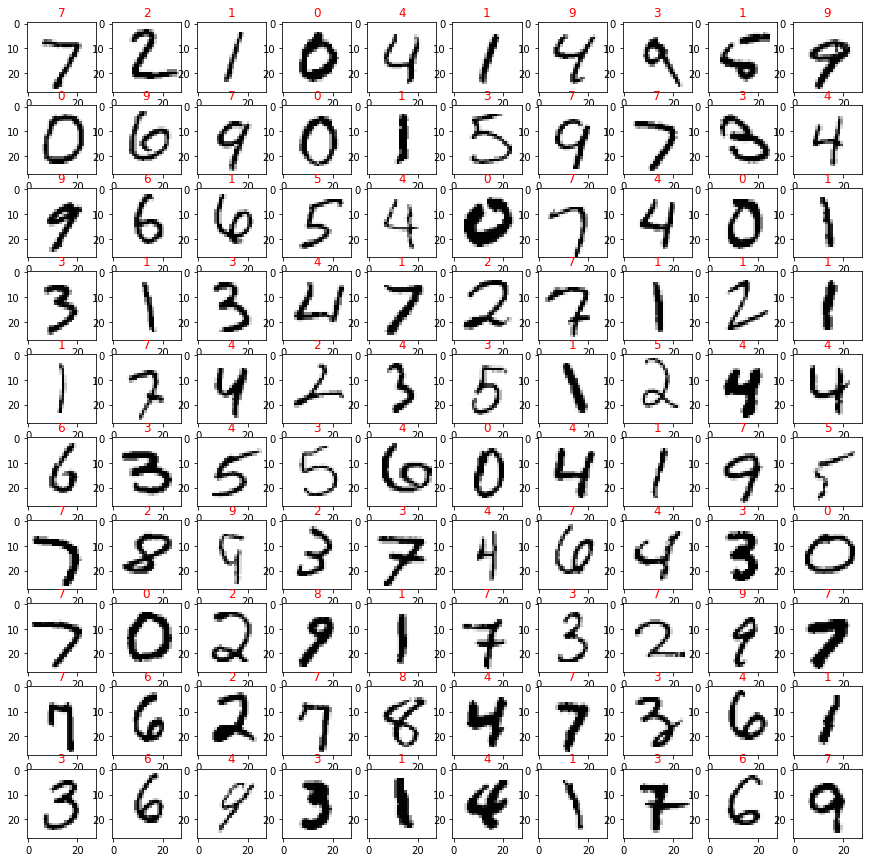

In [0]:
n = 10
fig, axs = plt.subplots(n, n, figsize=(15, 15))
for i in range(n):
  for j in range(n):
    arr = np.asfarray(test_data_list[i * n + j].split(','))[1:].reshape(28, 28)
    axs[i, j].imshow(arr, cmap='Greys')
    axs[i, j].set_title(recognized[i * n + j], c='red'); 

In [0]:
input_n = 784
hidden_n = 200
output_n = 10

learning_r = 0.1
nn3 = NeuralNetwork(input_nodes=input_n, hidden_nodes=hidden_n, output_nodes=output_n, learning_rate=learning_r)

In [0]:
with open('mnist_train.csv', 'r') as data2:
  data_list_full = data2.readlines()[1:]
  for line in data_list_full[:3]:
    print(line)

5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
epochs = 3

for e in range(epochs):
  for record in data_list_full:
    values = np.asfarray(record.split(','))
    scaled_input = values[1:] / 255.0 * 0.99 + 0.01
    targets = np.zeros(output_n) + 0.01
    targets[int(values[0])] = 0.99
    nn3.train(inputs_list=scaled_input, targets_list=targets)

In [0]:
scorecard2 = [] #ведем счет если угдали то 1 если нет то 0
recognized2 = []
fact2 = []

for record in test_data_list:
  values = np.asfarray(record.split(','))
  correct_label = int(values[0])
  scaled_inputs = values[1:] / 255.0 * 0.99 + 0.01
  outputs = nn3.query(inputs_list=scaled_inputs)
  label = np.argmax(outputs) # argmax - возвращает индекс самого большого элемента
  recognized2.append(label)
  fact.append(correct_label)
  if label == correct_label:
    scorecard2.append(1)
  else:
    scorecard2.append(0)

In [0]:
print(sum(scorecard2)/len(scorecard2))

0.9699


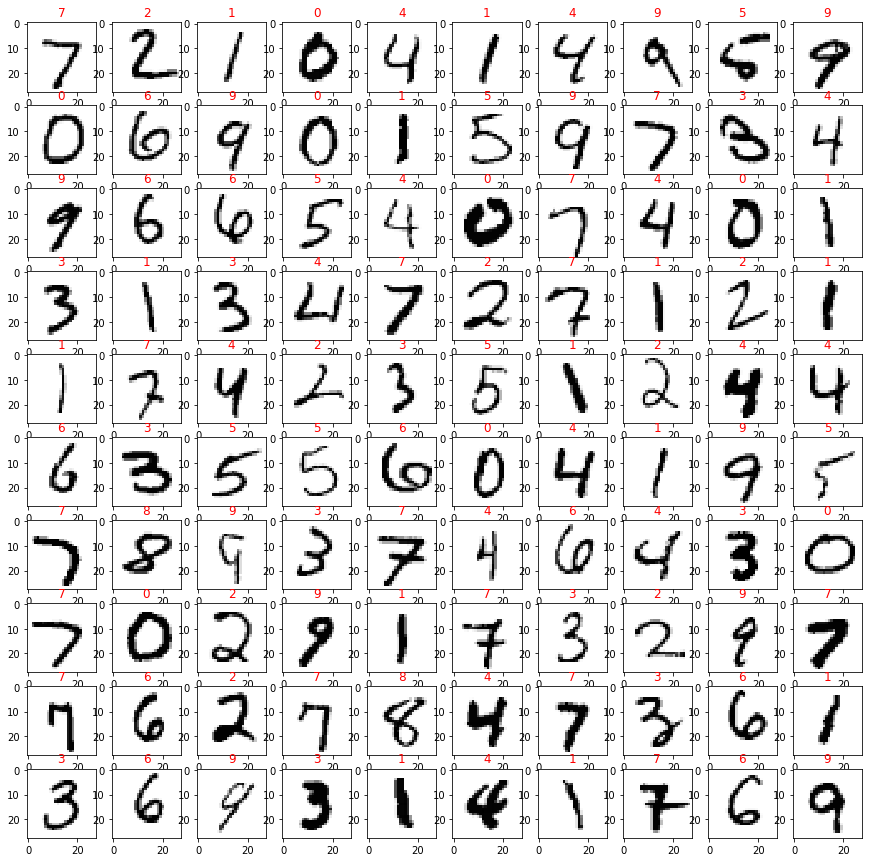

In [0]:
n = 10
fig, axs = plt.subplots(n, n, figsize=(15, 15))
for i in range(n):
  for j in range(n):
    arr = np.asfarray(test_data_list[i * n + j].split(','))[1:].reshape(28, 28)
    axs[i, j].imshow(arr, cmap='Greys')
    axs[i, j].set_title(recognized2[i * n + j], c='red'); 